In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [38]:
df = pd.read_csv('aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


Columns are as follows:

enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [40]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [41]:
gender_targ = df[['gender', 'enrollee_id']].groupby('gender').count()
gender_targ

,enrollee_id
gender,
Female,1238
Male,13221
Other,191


<AxesSubplot:title={'center':'Gender of people who successfully pass some courses conducted by the company'}, xlabel='Gender', ylabel='Frequency'>

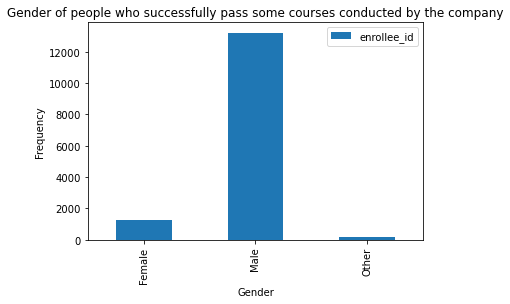

In [42]:
gender_targ.loc[['Female', 'Male', 'Other']].plot(kind='bar', 
                                                  title='Gender of people who successfully pass some courses conducted by the company',
                                                  xlabel='Gender',
                                                  ylabel='Frequency')

Видно, что большая часть успешно закончивших курсы компании -- мужчины

<AxesSubplot:xlabel='target', ylabel='city_development_index'>

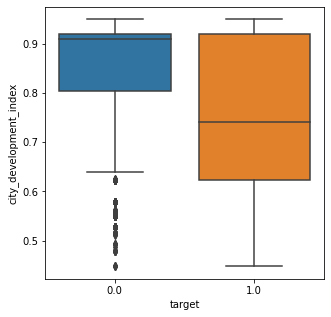

In [43]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='target', y='city_development_index')

Видно, что люди из городов с более низким индексом уровня развития чаще ищут новую работу

In [44]:
df['experience'] = df['experience'].replace('>20', 21)
df['experience'] = df['experience'].replace('<1', 0)
df['experience'] = df['experience'].fillna(np.random.choice(df['experience']))
df['experience'] = df['experience'].astype('float64')

In [45]:
countDat = df['experience'].value_counts()
countDat

21.0    3286
4.0     1468
5.0     1430
3.0     1354
6.0     1216
2.0     1127
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
1.0      549
0.0      522
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
Name: experience, dtype: int64

<AxesSubplot:title={'center':'USer Score distribution'}, ylabel='Frequency'>

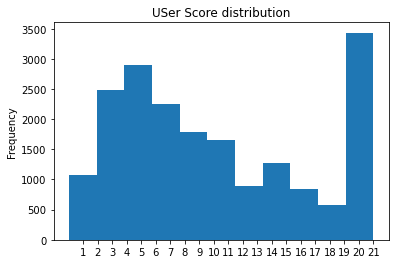

In [46]:
df.experience.plot(kind='hist', 
                   bins=11,
                   title='USer Score distribution',
                   xlabel='Experience',
                   xticks=range(1, 22))

Наибольшее число проходивших курсы имеют 20 или более лет опыта,а за ними следуют люди с опытом от 2 до 6 лет

In [47]:
the_dependence = df[['experience','training_hours']] \
    .groupby('experience').sum()
the_dependence

,training_hours
experience,
0.0,32029
1.0,35861
2.0,71269
3.0,88930
4.0,95949
5.0,96151
6.0,80995
7.0,66267
8.0,54450


Text(0, 0.5, 'training hours')

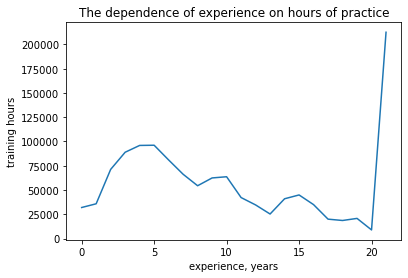

In [48]:
plt.plot(the_dependence.index, the_dependence.training_hours)
plt.title('The dependence of experience on hours of practice')
plt.xlabel('experience, years')
plt.ylabel('training hours')

Видно, что курсы проходили, в основном люди, работающие в сфере от 3 до 5 лет, также наблюдается повышение значений каждые пять лет, т.к.,возможно, участники с большим опытом работы время от времени идут на курсы, чтобы развить свои навыки. Также наблюдаются большие значения у людей с опытом более 20 лет, т.к. таких участников наибольшее число 